In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

import warnings

warnings.filterwarnings("ignore")

In [2]:
import functions_20221010

In [3]:
LABEL = 'Price'

booleans = []
floats = ['location.latitude', 'location.longitude', 'bedrooms', 'bathrooms', 'nearestStation', 'latitude_deviation','latitude_deviation2', 'longitude_deviation','longitude_deviation2']
categories = ['tenure.tenureType']

features = []
features.extend(booleans)
features.extend(floats)
features.extend(categories)
print(colored(f"features", "blue"), "-> ", features)

features.insert(0, LABEL)
print(colored(f"label", "green"), "-> ", LABEL)

features ->  ['location.latitude', 'location.longitude', 'bedrooms', 'bathrooms', 'nearestStation', 'latitude_deviation', 'latitude_deviation2', 'longitude_deviation', 'longitude_deviation2', 'tenure.tenureType']
label ->  Price


In [4]:
IN_COLAB = False

VERSION = 'v03'
filename = f'df_listings_{VERSION}.csv'
remote_pathname = f'https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/{filename}'

df_pathname_raw = f'../../data/source/{filename}'
df_pathname_tidy = f'../../data/final/{filename}'

df_orig = pd.read_csv(df_pathname_tidy, on_bad_lines='error', index_col=0)

In [5]:
df = functions_20221010.pre_tidy_dataset(df_orig, warnings=False)

In [6]:
df = df[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51963 entries, 14520525 to 126181118
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 51963 non-null  int64  
 1   location.latitude     51953 non-null  float64
 2   location.longitude    51963 non-null  float64
 3   bedrooms              50221 non-null  float64
 4   bathrooms             48796 non-null  float64
 5   nearestStation        51963 non-null  float64
 6   latitude_deviation    51953 non-null  float64
 7   latitude_deviation2   51953 non-null  float64
 8   longitude_deviation   51963 non-null  float64
 9   longitude_deviation2  51963 non-null  float64
 10  tenure.tenureType     48582 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 4.8+ MB


In [7]:
print(len(df_orig))
old_length = len(df_orig)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51963
51963 ==> 51963


<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    ACTION - Force location.latitude to be a float, rather than a string
</h2>
</div>

In [8]:
df['location.latitude'] = pd.to_numeric(df['location.latitude'], 'coerce').dropna().astype(float)

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51963 ==> 51963


In [9]:
df['tenure.tenureType'] = df['tenure.tenureType'].astype('category')

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

51963 ==> 51963


In [10]:
df.describe(include=['object','float64','int','category'], exclude=[]).T

count unique        top   freq          mean  \
Price                 51963.0    NaN        NaN    NaN  420261.55195   
location.latitude     51953.0    NaN        NaN    NaN      51.49666   
location.longitude    51963.0    NaN        NaN    NaN     -0.104721   
bedrooms              50221.0    NaN        NaN    NaN     11.752414   
bathrooms             48796.0    NaN        NaN    NaN      1.177166   
nearestStation        51963.0    NaN        NaN    NaN      0.445197   
latitude_deviation    51953.0    NaN        NaN    NaN       0.06345   
latitude_deviation2   51953.0    NaN        NaN    NaN        0.0695   
longitude_deviation   51963.0    NaN        NaN    NaN      0.134302   
longitude_deviation2  51963.0    NaN        NaN    NaN      0.138938   
tenure.tenureType       48582      4  LEASEHOLD  29914           NaN   

                                std        min        25%        50%  \
Price                 110006.618045   100000.0   330000.0   425000.0   
location.latitude          0.076422  51.298317  51.439677  51.499652   
location.longitude         0.732518  -0.498315  -0.211772   -0.10444   
bedrooms                 2186.51099        1.0        1.0        2.0   
bathrooms                  0.410474        1.0        1.0        1.0   
nearestStation             1.066998        0.0   0.224388   0.364267   
latitude_deviation         0.042701        0.0    0.02774   0.057224   
latitude_deviation2         0.04654        0.0   0.031156   0.063721   
longitude_deviation        0.720101        0.0   0.044222      0.099   
longitude_deviation2       0.720311        0.0     0.0465   0.103158   
tenure.tenureType               NaN        NaN        NaN        NaN   

                           75%         max  
Price                 500000.0    600000.0  
location.latitude     51.55458   51.683185  
location.longitude   -0.011463   51.558746  
bedrooms                   3.0    490000.0  
bathrooms                  1.0        12.0  
nearestStation        0.557841  192.431869  
latitude_deviation    0.093732    0.201335  
latitude_deviation2   0.100978    0.220523  
longitude_deviation   0.192605   51.663186  
longitude_deviation2  0.197419   51.623851  
tenure.tenureType          NaN         NaN

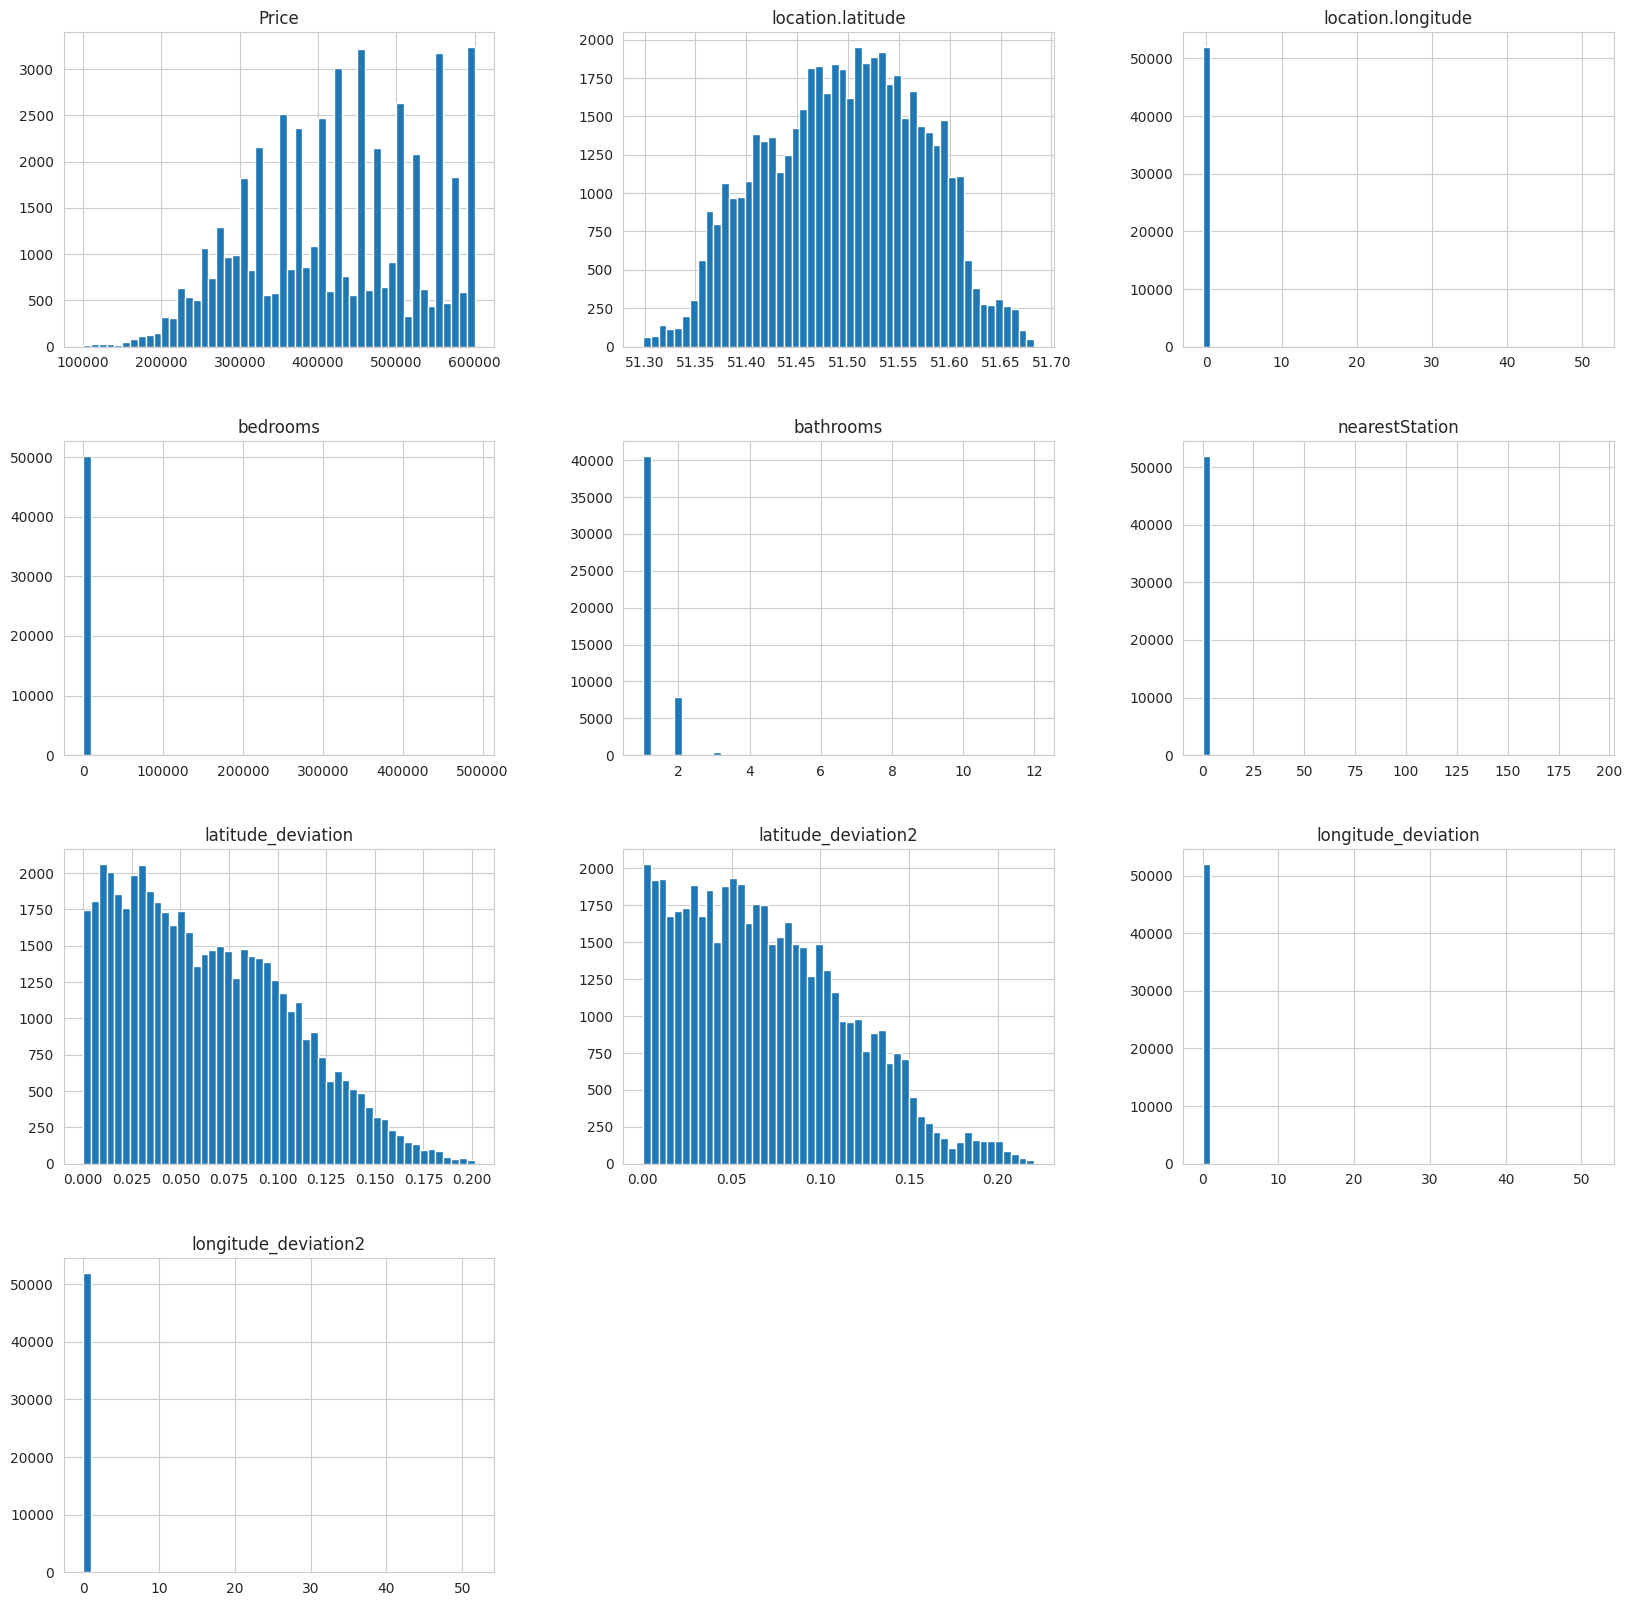

In [11]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 20))
plt.show()

<div id = 3 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#b08888;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px;
           display:flex;
            justify-content:center;">

<h2 style="padding: 2rem;
              color:white;
          text-align:center;
          margin:0 auto;
          ">
    IDENTIFY OUTLIERS


</h2>
</div>

In [12]:
df.isna().sum()

Price                      0
location.latitude         10
location.longitude         0
bedrooms                1742
bathrooms               3167
nearestStation             0
latitude_deviation        10
latitude_deviation2       10
longitude_deviation        0
longitude_deviation2       0
tenure.tenureType       3381
dtype: int64

In [13]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 5].sort_values('bedrooms',ascending=False)

Price  location.latitude  location.longitude  bedrooms  bathrooms  \
125513798  490000          51.580290           -0.340270  490000.0        2.0   
125880485  600000          51.440830           -0.038410       7.0        5.0   
125543333  550000          51.594000            0.160060       7.0        NaN   
119217689  525000          51.538560            0.118210       7.0        2.0   
124019570  600000          51.529453            0.184820       7.0        2.0   
84063621   600000          51.662239           -0.035894       6.0        2.0   
123811142  600000          51.474324            0.131402       6.0        1.0   
125568515  575000          51.527980           -0.461629       6.0        3.0   
125047877  525000          51.659081           -0.042710       6.0        3.0   
125000246  525000          51.489867            0.055150       6.0        2.0   
124799777  520000          51.479360            0.079170       6.0        2.0   
124064753  599950          51.392482           -0.296887       6.0        3.0   
123693851  535000          51.643021           -0.048691       6.0        3.0   
84739572   600000          51.396383           -0.120228       6.0        2.0   
122834111  499995          51.482780            0.089120       6.0        4.0   
122436188  600000          51.516180            0.056490       6.0        5.0   
121793234  500000          51.552974            0.058253       6.0        2.0   
120996098  560000          51.369340           -0.114890       6.0        2.0   
120366419  400000          51.451404           -0.017425       6.0        2.0   
120165197  550000          51.543911            0.075780       6.0        3.0   
116167328  600000          51.460215           -0.335873       6.0        3.0   
115579406  550000          51.506092           -0.476882       6.0        3.0   
111897098  580000          51.545448            0.051230       6.0        4.0   
125898833  575000          51.449267            0.106676       6.0        3.0   

           nearestStation  latitude_deviation  latitude_deviation2  \
125513798        0.150384            0.080638             0.117628   
125880485        0.592204            0.058822             0.021832   
125543333        1.642956            0.094348             0.131338   
119217689        0.393151            0.038908             0.075898   
124019570        0.909304            0.029801             0.066791   
84063621         0.525190            0.162587             0.199577   
123811142        0.758594            0.025328             0.011662   
125568515        1.334739            0.028328             0.065318   
125047877        0.592597            0.159429             0.196419   
125000246        0.118946            0.009785             0.027205   
124799777        0.743722            0.020292             0.016698   
124064753        0.330673            0.107170             0.070180   
123693851        0.416445            0.143369             0.180359   
84739572         0.836096            0.103269             0.066279   
122834111        0.514528            0.016872             0.020118   
122436188        0.157157            0.016528             0.053518   
121793234        0.522288            0.053322             0.090312   
120996098        0.165819            0.130312             0.093322   
120366419        0.339003            0.048248             0.011258   
120165197        0.406018            0.044259             0.081249   
116167328        0.725541            0.039437             0.002447   
115579406        0.326105            0.006440             0.043430   
111897098        0.392721            0.045796             0.082786   
125898833        1.077764            0.050385             0.013395   

           longitude_deviation  longitude_deviation2 tenure.tenureType  
125513798             0.235830              0.275165         LEASEHOLD  
125880485             0.066030              0.026695          FREEHOLD  
125543333       

In [14]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bedrooms'] > 10].sort_values('bedrooms',ascending=False)

Price  location.latitude  location.longitude  bedrooms  bathrooms  \
125513798  490000           51.58029            -0.34027  490000.0        2.0   

           nearestStation  latitude_deviation  latitude_deviation2  \
125513798        0.150384            0.080638             0.117628   

           longitude_deviation  longitude_deviation2 tenure.tenureType  
125513798              0.23583              0.275165         LEASEHOLD

In [15]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['bathrooms'] > 5]

Price  location.latitude  location.longitude  bedrooms  bathrooms  \
122875514  485000          51.400012           -0.062682       3.0       12.0   
123034523  365000          51.511447            0.012305       1.0       11.0   

           nearestStation  latitude_deviation  latitude_deviation2  \
122875514        0.095729            0.099640             0.062650   
123034523        0.242776            0.011795             0.048785   

           longitude_deviation  longitude_deviation2 tenure.tenureType  
122875514             0.041758              0.002423          FREEHOLD  
123034523             0.116745              0.077410               NaN

In [16]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['location.longitude'] > 10]

Price  location.latitude  location.longitude  bedrooms  bathrooms  \
117726977  250000                NaN           51.416213       NaN        NaN   
118737587  600000                NaN           51.476357       4.0        2.0   
119410649  280000                NaN           51.558746       2.0        2.0   
120572951  300000                NaN           51.400795       NaN        1.0   
121441124  300000                NaN           51.521018       NaN        NaN   
122251739  400000                NaN           51.467950       3.0        2.0   
123704549  395000                NaN           51.470790       4.0        2.0   
124725866  395000                NaN           51.419006       NaN        NaN   
124725887  400000                NaN           51.475860       NaN        NaN   
124900562  220000                NaN           51.537886       NaN        NaN   

           nearestStation  latitude_deviation  latitude_deviation2  \
117726977        0.204070                 NaN                  NaN   
118737587        0.559261                 NaN                  NaN   
119410649        0.060633                 NaN                  NaN   
120572951        0.403894                 NaN                  NaN   
121441124        0.141185                 NaN                  NaN   
122251739        0.352386                 NaN                  NaN   
123704549        0.499003                 NaN                  NaN   
124725866        0.346325                 NaN                  NaN   
124725887        0.392091                 NaN                  NaN   
124900562        0.549313                 NaN                  NaN   

           longitude_deviation  longitude_deviation2 tenure.tenureType  
117726977            51.520653             51.481318         LEASEHOLD  
118737587            51.580797             51.541462          FREEHOLD  
119410649            51.663186             51.623851         LEASEHOLD  
120572951            51.505235             51.465900          FREEHOLD  
121441124            51.625458             51.586123         LEASEHOLD  
122251739            51.572390             51.533055          FREEHOLD  
123704549            51.575230             51.535895          FREEHOLD  
124725866            51.523446             51.484111          FREEHOLD  
124725887            51.580300             51.540965          FREEHOLD  
124900562            51.642326             51.602991          FREEHOLD

In [17]:
# Identifying outliers, in order to try and verify (from the source data) that they are incorrect data.
df[df['nearestStation'] > 20]

Price  location.latitude  location.longitude  bedrooms  bathrooms  \
105719081  224995          51.457055           -0.131578       3.0        2.0   
117858356  285000          51.461170            0.149245       2.0        NaN   
122768234  270000          51.427000            0.019000       3.0        2.0   

           nearestStation  latitude_deviation  latitude_deviation2  \
105719081      192.431869            0.042597             0.005607   
117858356       40.309392            0.038482             0.001492   
122768234      119.325844            0.072652             0.035662   

           longitude_deviation  longitude_deviation2 tenure.tenureType  
105719081             0.027138              0.066473          FREEHOLD  
117858356             0.253685              0.214350          FREEHOLD  
122768234             0.123440              0.084105          FREEHOLD

In [18]:
df = df[(df['bedrooms'] <= 10)]
df = df[df['bathrooms'] <= 5]
df = df[((df['location.longitude'] <= 10) & (df['longitude_deviation'] <= 10)  & (df['longitude_deviation2'] <= 10) )]
df = df[(df['nearestStation'] <= 20)]

print(f"{old_length} ==> {len(df)}")
old_length = len(df)

df.describe().T

51963 ==> 47296


count           mean            std           min  \
Price                 47296.0  424469.678599  107681.003293  1.000000e+05   
location.latitude     47296.0      51.496955       0.077080  5.129832e+01   
location.longitude    47296.0      -0.113224       0.156355 -4.983150e-01   
bedrooms              47296.0       1.991373       0.828635  1.000000e+00   
bathrooms             47296.0       1.182172       0.410106  1.000000e+00   
nearestStation        47296.0       0.439735       0.350406  0.000000e+00   
latitude_deviation    47296.0       0.064304       0.042586  0.000000e+00   
latitude_deviation2   47296.0       0.070161       0.046847  4.000000e-07   
longitude_deviation   47296.0       0.124088       0.095529  0.000000e+00   
longitude_deviation2  47296.0       0.128341       0.101443  2.000000e-07   

                                25%            50%            75%  \
Price                 345000.000000  425000.000000  515000.000000   
location.latitude         51.438664      51.499887      51.556007   
location.longitude        -0.210739      -0.102282      -0.010379   
bedrooms                   1.000000       2.000000       3.000000   
bathrooms                  1.000000       1.000000       1.000000   
nearestStation             0.226653       0.367761       0.559066   
latitude_deviation         0.028809       0.058585       0.094405   
latitude_deviation2        0.031478       0.064619       0.101836   
longitude_deviation        0.043521       0.098960       0.192495   
longitude_deviation2       0.045573       0.102343       0.196653   

                                max  
Price                 600000.000000  
location.latitude         51.683185  
location.longitude         0.279726  
bedrooms                   7.000000  
bathrooms                  5.000000  
nearestStation            16.168861  
latitude_deviation         0.201335  
latitude_deviation2        0.220523  
longitude_deviation        0.393875  
longitude_deviation2       0.433210

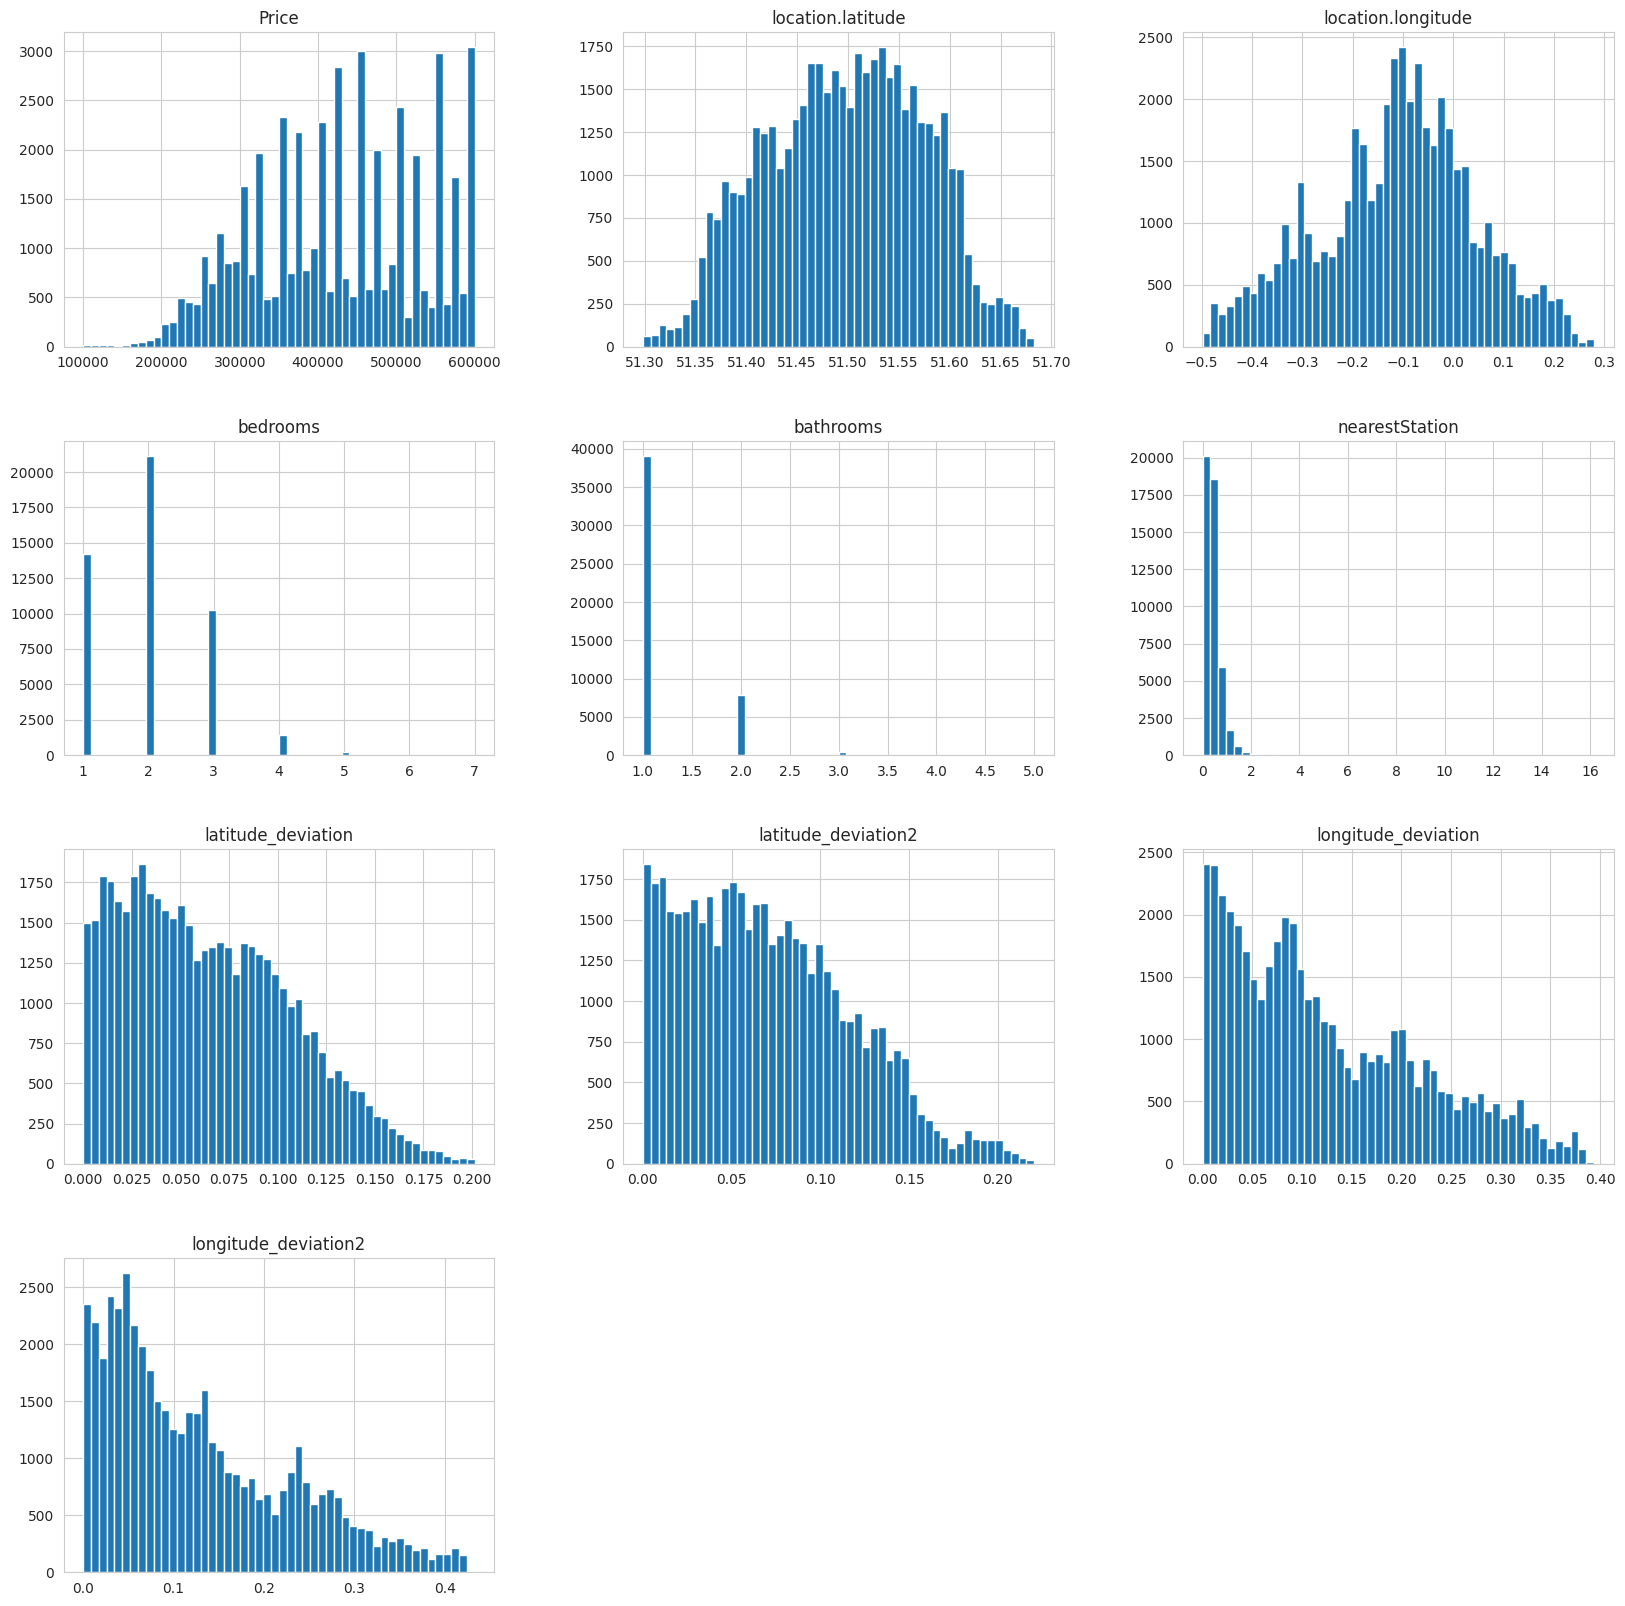

In [19]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [20]:
df.isna().any()
df.isna().sum()

Price                      0
location.latitude          0
location.longitude         0
bedrooms                   0
bathrooms                  0
nearestStation             0
latitude_deviation         0
latitude_deviation2        0
longitude_deviation        0
longitude_deviation2       0
tenure.tenureType       2760
dtype: int64

In [21]:
df = df.dropna()
print(f"{old_length} ==> {len(df)}")
old_length = len(df)
df.describe()

47296 ==> 44536


Price  location.latitude  location.longitude      bedrooms  \
count   44536.000000       44536.000000        44536.000000  44536.000000   
mean   424609.250898          51.496603           -0.113049      1.990053   
std    107654.185067           0.077262            0.155732      0.827432   
min    100000.000000          51.298317           -0.498315      1.000000   
25%    345000.000000          51.438160           -0.210552      1.000000   
50%    425000.000000          51.498676           -0.101931      2.000000   
75%    515000.000000          51.556100           -0.010872      3.000000   
max    600000.000000          51.683185            0.279726      7.000000   

          bathrooms  nearestStation  latitude_deviation  latitude_deviation2  \
count  44536.000000    44536.000000        44536.000000         4.453600e+04   
mean       1.181449        0.439503            0.064529         7.006823e-02   
std        0.409188        0.350229            0.042599         4.702881e-02   
min        1.000000        0.000000            0.000000         4.000000e-07   
25%        1.000000        0.227205            0.028975         3.108160e-02   
50%        1.000000        0.368114            0.058904         6.442100e-02   
75%        1.000000        0.558861            0.094644         1.018984e-01   
max        5.000000       16.168861            0.201335         2.205226e-01   

       longitude_deviation  longitude_deviation2  
count         44536.000000          4.453600e+04  
mean              0.123587          1.278087e-01  
std               0.095144          1.010732e-01  
min               0.000000          2.000000e-07  
25%               0.043483          4.530595e-02  
50%               0.098666          1.019750e-01  
75%               0.191621          1.957660e-01  
max               0.393875          4.332102e-01

In [22]:
df_features = df.drop(LABEL, axis=1)
df_features

location.latitude  location.longitude  bedrooms  bathrooms  \
14520525           51.529950           -0.207020       3.0        1.0   
27953107           51.549390           -0.482600       2.0        2.0   
33593487           51.447180           -0.338770       2.0        1.0   
35271294           51.449568           -0.140154       2.0        1.0   
44749111           51.370050           -0.212410       2.0        1.0   
...                      ...                 ...       ...        ...   
126179018          51.370651           -0.238346       2.0        1.0   
126179672          51.357170           -0.074740       3.0        2.0   
126180107          51.531415           -0.052964       2.0        1.0   
126180704          51.543141            0.011498       2.0        1.0   
126181118          51.424589           -0.206790       2.0        1.0   

           nearestStation  latitude_deviation  latitude_deviation2  \
14520525         0.274316            0.030298             0.067288   
27953107         0.305845            0.049738             0.086728   
33593487         0.438045            0.052472             0.015482   
35271294         0.399307            0.050084             0.013094   
44749111         0.410550            0.129602             0.092612   
...                   ...                 ...                  ...   
126179018        0.682879            0.129001             0.092011   
126179672        0.545665            0.142482             0.105492   
126180107        0.191407            0.031763             0.068753   
126180704        0.308609            0.043489             0.080479   
126181118        0.238489            0.075063             0.038073   

           longitude_deviation  longitude_deviation2  tenure.tenureType  
14520525              0.102580              0.141915          LEASEHOLD  
27953107              0.378160              0.417495          LEASEHOLD  
33593487              0.234330              0.273665           FREEHOLD  
35271294              0.035714              0.075049          LEASEHOLD  
44749111              0.107970              0.147305           FREEHOLD  
...                        ...                   ...                ...  
126179018             0.133906              0.173241           FREEHOLD  
126179672             0.029700              0.009635          LEASEHOLD  
126180107             0.051476              0.012141          LEASEHOLD  
126180704             0.115938              0.076603          LEASEHOLD  
126181118             0.102350              0.141685  SHARE_OF_FREEHOLD  

[44536 rows x 10 columns]

In [23]:
use_one_hot_encoding_not_dummies = False

if use_one_hot_encoding_not_dummies:
    raise NotImplementedError('not implemented one hot encoding yet')

    #from sklearn.preprocessing import OneHotEncoder
    #tenure_encoder = OneHotEncoder()
    #df_tenure_type = tenure_encoder.fit_transform(df_features[['tenure.tenureType']])
else:
    for column in categories:
        df_features = pd.concat([df_features, pd.get_dummies(df_features[column], prefix=column, drop_first=True)], axis=1)
        df_features.drop([column], axis=1, inplace=True)  # now drop the original column (you don't need it anymore),

features_corr = df_features.corr()
features_corr

location.latitude  location.longitude  \
location.latitude                             1.000000            0.095478   
location.longitude                            0.095478            1.000000   
bedrooms                                      0.004932            0.115991   
bathrooms                                     0.001838            0.016201   
nearestStation                                0.028699            0.039292   
latitude_deviation                           -0.108139            0.045376   
latitude_deviation2                           0.543257            0.097054   
longitude_deviation                           0.181188           -0.167838   
longitude_deviation2                          0.106574           -0.460723   
tenure.tenureType_FREEHOLD                   -0.000473            0.138252   
tenure.tenureType_LEASEHOLD                   0.024435           -0.070277   
tenure.tenureType_SHARE_OF_FREEHOLD          -0.036079           -0.083347   

                                     bedrooms  bathrooms  nearestStation  \
location.latitude                    0.004932   0.001838        0.028699   
location.longitude                   0.115991   0.016201        0.039292   
bedrooms                             1.000000   0.329237        0.223272   
bathrooms                            0.329237   1.000000        0.047727   
nearestStation                       0.223272   0.047727        1.000000   
latitude_deviation                   0.195599   0.024510        0.148372   
latitude_deviation2                  0.158612   0.032839        0.140902   
longitude_deviation                  0.186802   0.083234        0.298048   
longitude_deviation2                 0.128159   0.062572        0.252763   
tenure.tenureType_FREEHOLD           0.595725   0.090121        0.284858   
tenure.tenureType_LEASEHOLD         -0.460417  -0.039369       -0.203940   
tenure.tenureType_SHARE_OF_FREEHOLD -0.121631  -0.063648       -0.082427   

                                     latitude_deviation  latitude_deviation2  \
location.latitude                             -0.108139             0.543257   
location.longitude                             0.045376             0.097054   
bedrooms                                       0.195599             0.158612   
bathrooms                                      0.024510             0.032839   
nearestStation                                 0.148372             0.140902   
latitude_deviation                             1.000000             0.707994   
latitude_deviation2                            0.707994             1.000000   
longitude_deviation                           -0.177847            -0.005607   
longitude_deviation2                          -0.145884            -0.032731   
tenure.tenureType_FREEHOLD                     0.231473             0.196468   
tenure.tenureType_LEASEHOLD                   -0.211285            -0.146772   
tenure.tenureType_SHARE_OF_FREEHOLD            0.001556            -0.047506   

                                     longitude_deviation  \
location.latitude                               0.181188   
location.longitude                             -0.167838   
bedrooms                                        0.186802   
bathrooms                                       0.083234   
nearestStation                                  0.298048   
latitude_deviation                             -0.177847   
latitude_deviation2                            -0.005607   
longitude_deviation                             1.000000   
longitude_deviation2                            0.928547   
tenure.tenureType_FREEHOLD                      0.277642   
tenure.tenureType_LEASEHOLD                    -0.179920   
tenure.tenureType_SHARE_OF_FREEHOLD            -0.108688   

                                     longitude_deviation2  \
location.latitude                                0.106574   
location.longitude                              -0.460723   
bedrooms                    

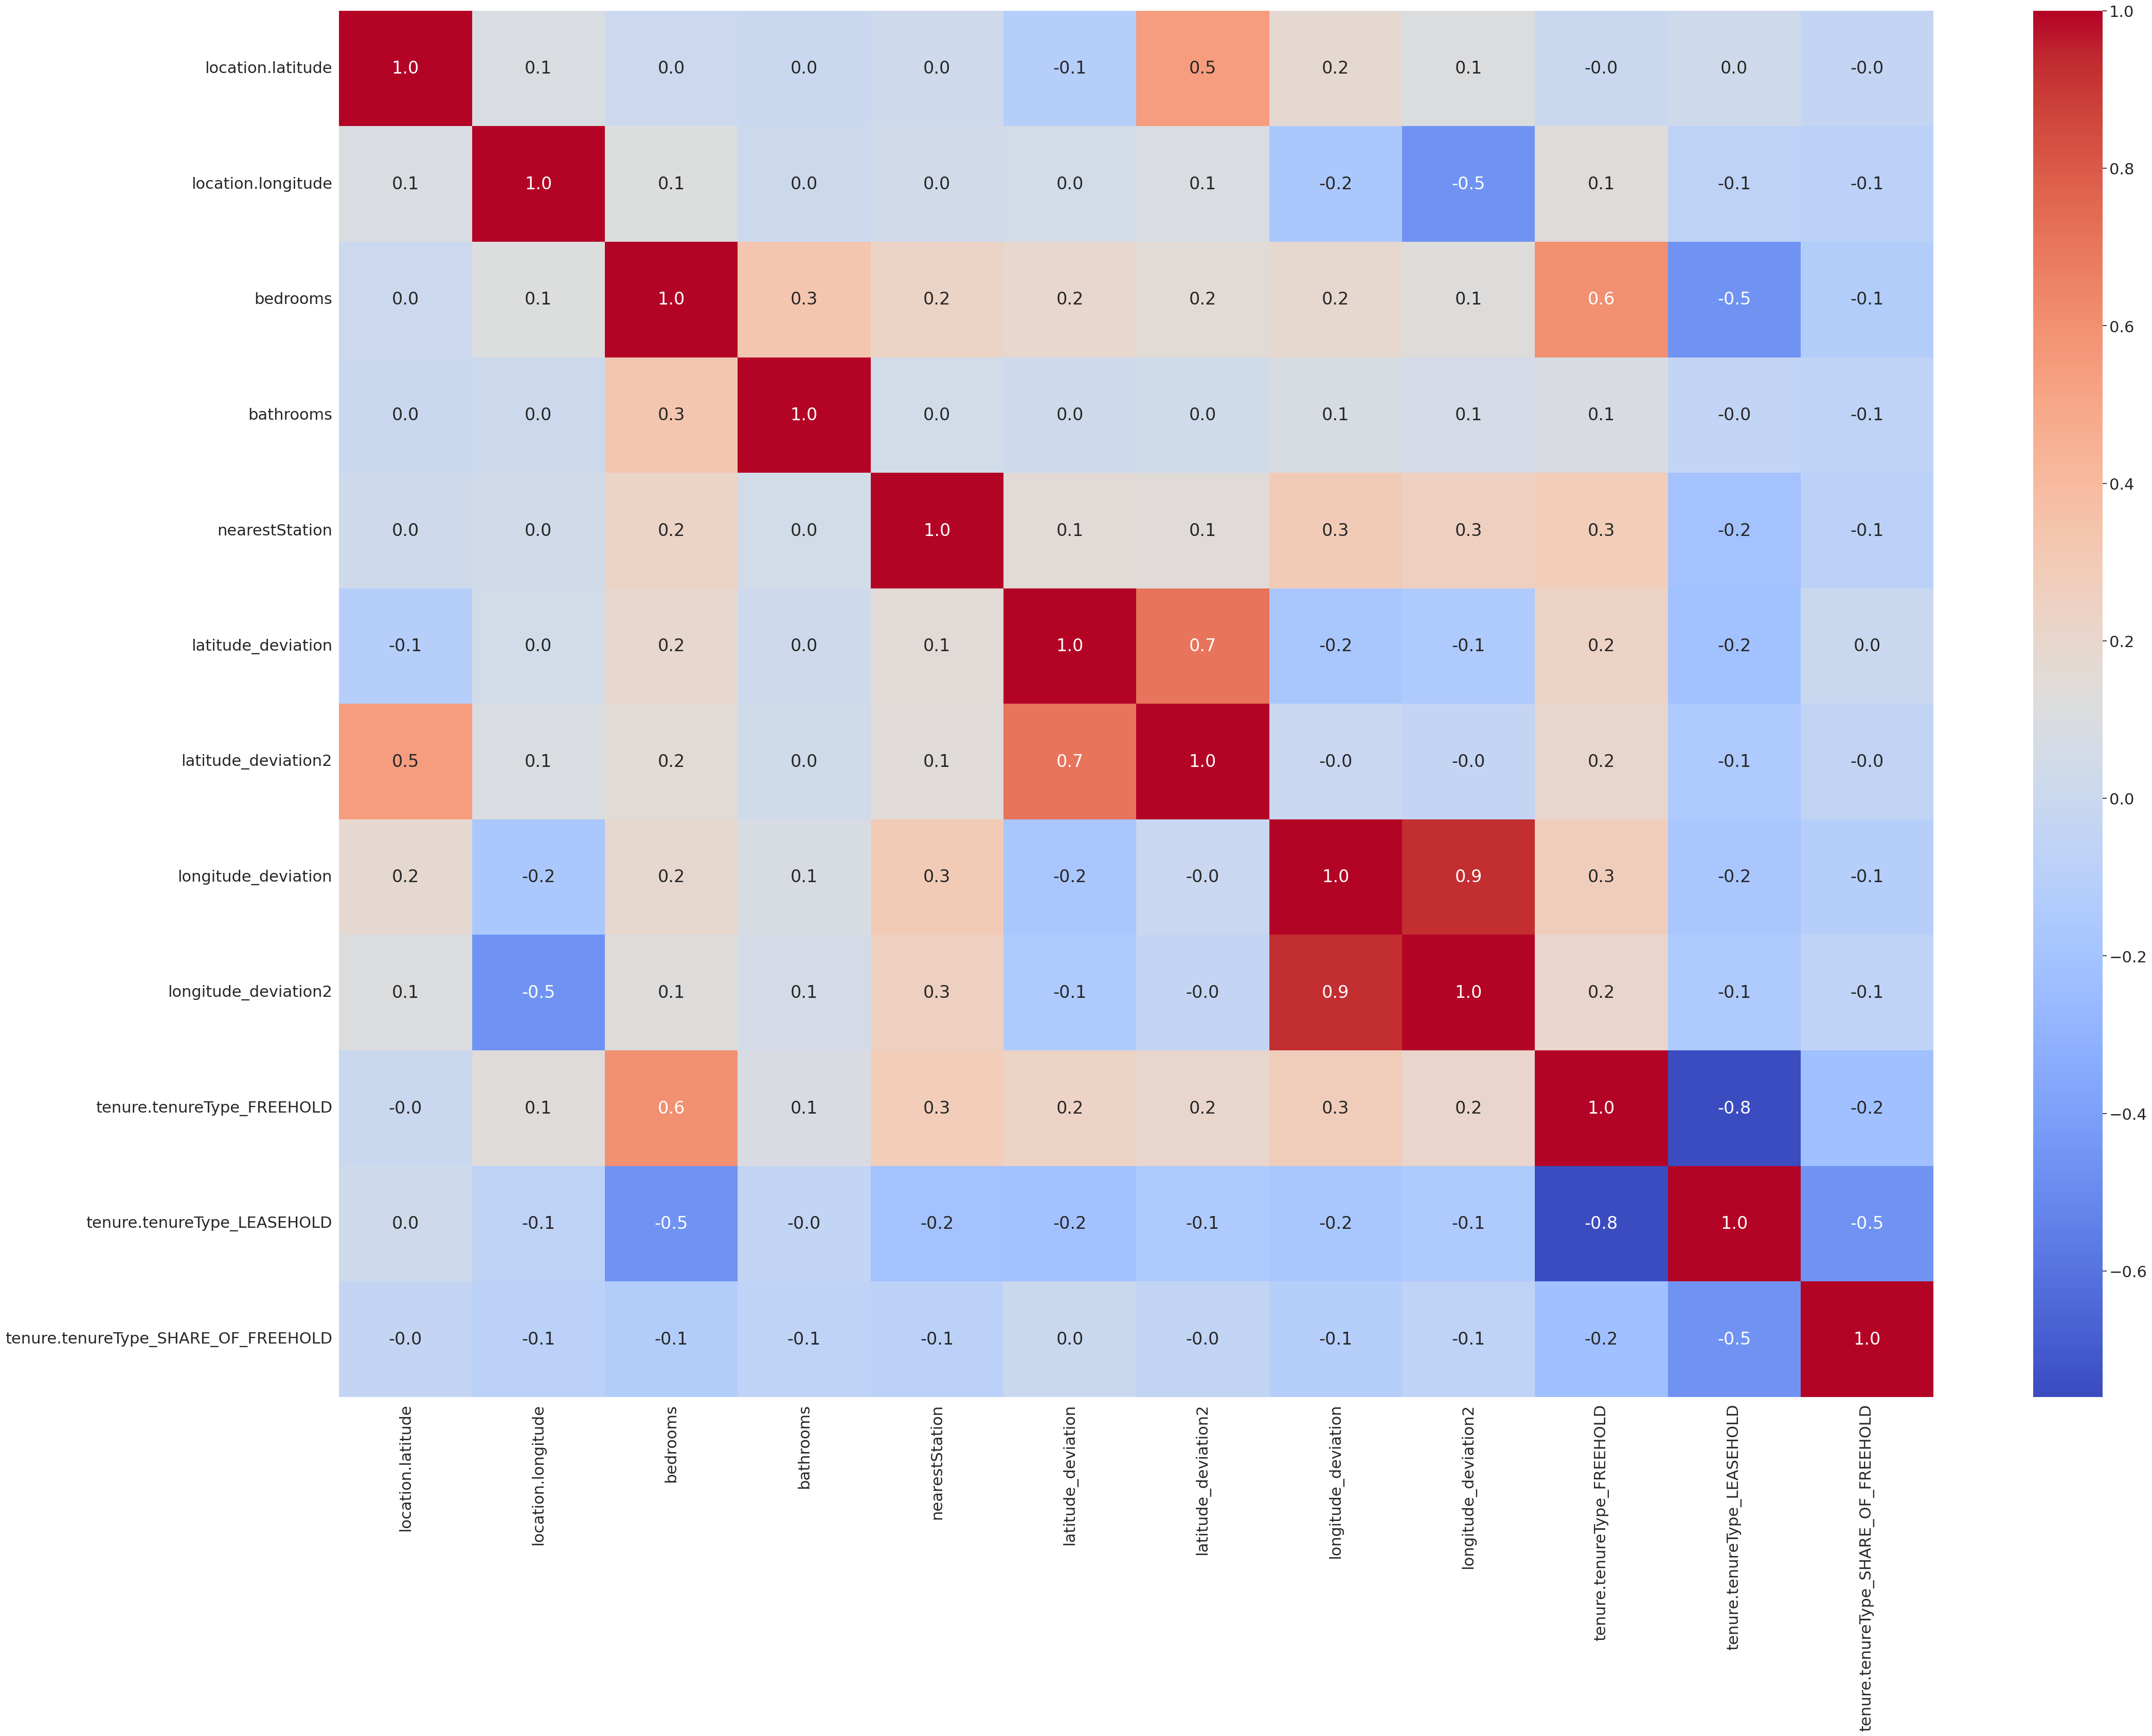

In [24]:
sns.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sns.heatmap(features_corr, annot=True, fmt='.1f', cmap='coolwarm')

In [25]:
data_corr = df.corr()
data_corr_dict = data_corr["Price"].sort_values(ascending=False).to_dict()
data_corr_dict

{'Price': 1.0,
 'bedrooms': 0.47356266446590006,
 'bathrooms': 0.26694688067654465,
 'location.latitude': 0.06206686686077184,
 'nearestStation': -0.02235425400098985,
 'longitude_deviation2': -0.03852539831906873,
 'latitude_deviation2': -0.043679308129473064,
 'location.longitude': -0.07130970951492885,
 'longitude_deviation': -0.0819126028461537,
 'latitude_deviation': -0.10098424919039317}

In [26]:
#print the most positively correlated features
pos_corr = {k: v for k, v in data_corr_dict.items() if v > 0.1 and v != 1}
pos_corr

{'bedrooms': 0.47356266446590006, 'bathrooms': 0.26694688067654465}

In [27]:
#print the most negatively correlated features
neg_corr = {k: v for k, v in data_corr_dict.items() if v < -0.1}
neg_corr

{'latitude_deviation': -0.10098424919039317}

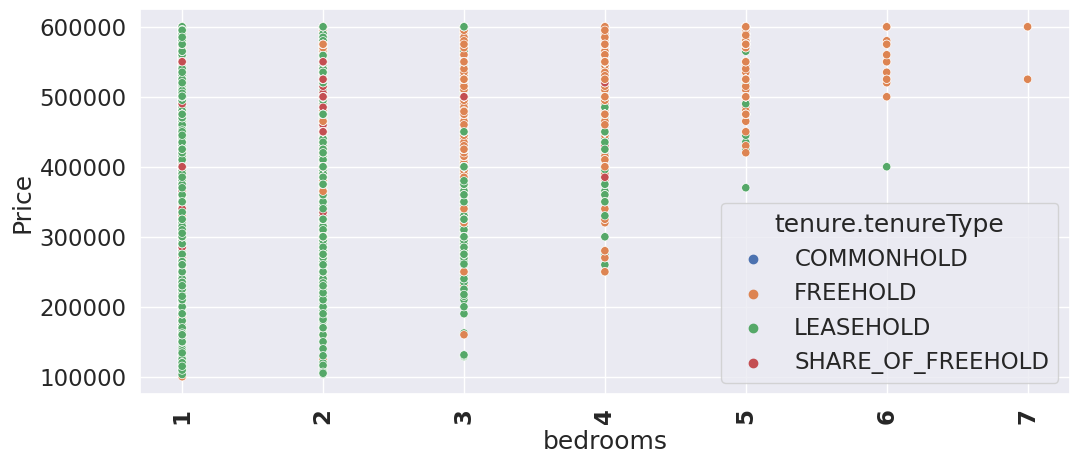

In [28]:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.5)
sns.scatterplot(x='bedrooms', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

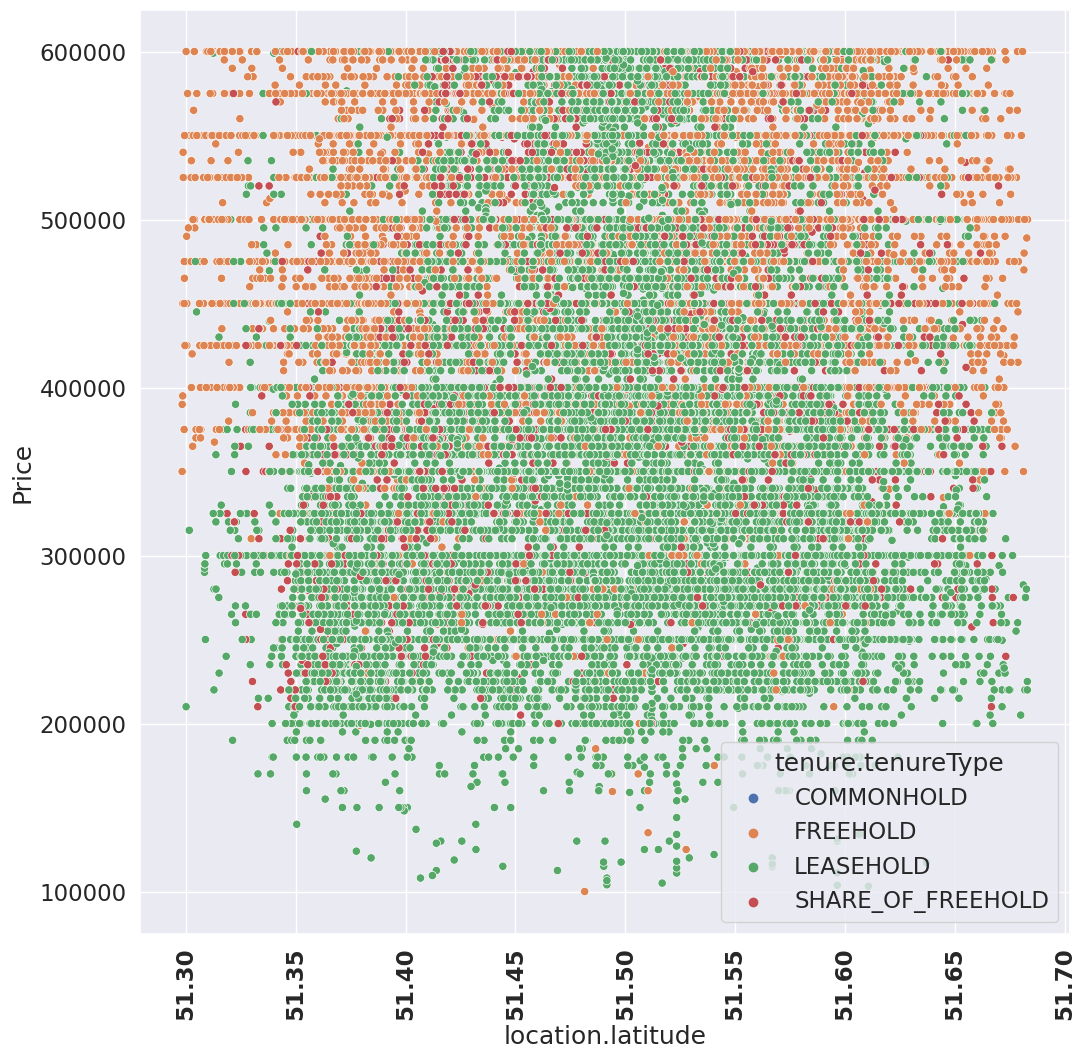

In [29]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

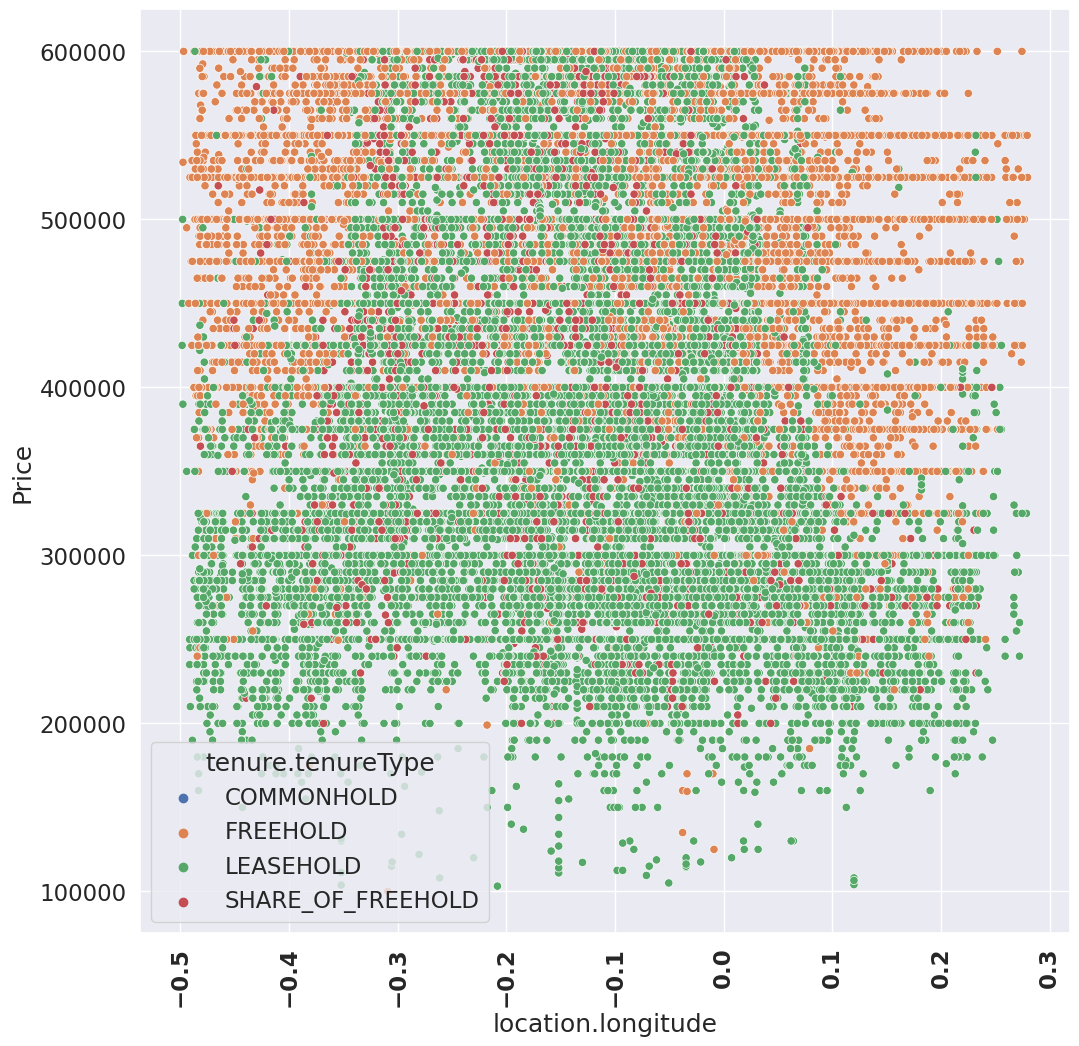

In [30]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.longitude', y='Price', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

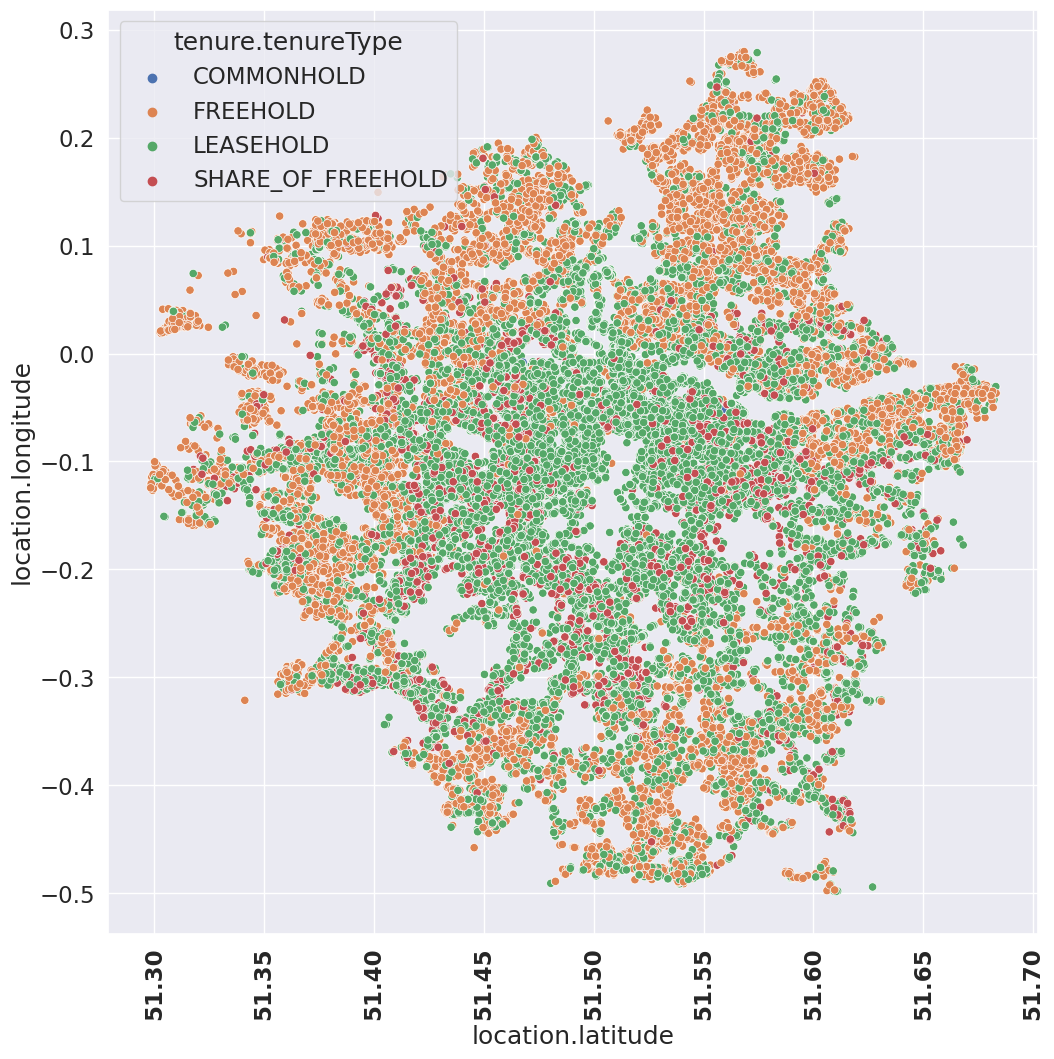

In [31]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='location.longitude', data=df, hue='tenure.tenureType')
plt.xticks(weight='bold', rotation=90)
plt.show()

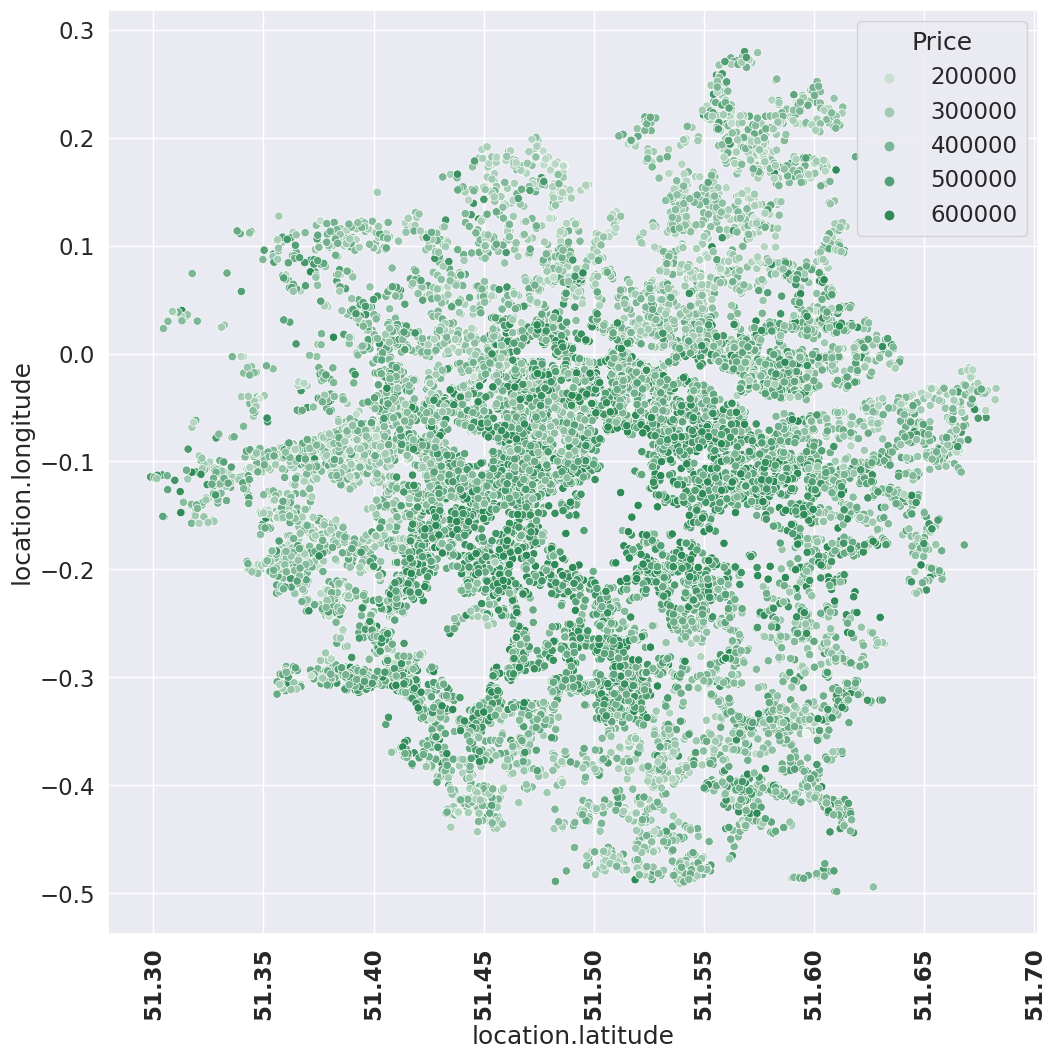

In [32]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='location.longitude', data=df[(df['bedrooms'] == 2)], hue='Price',palette=sns.light_palette("seagreen", as_cmap=True), alpha=1)
plt.xticks(weight='bold', rotation=90)
plt.show()

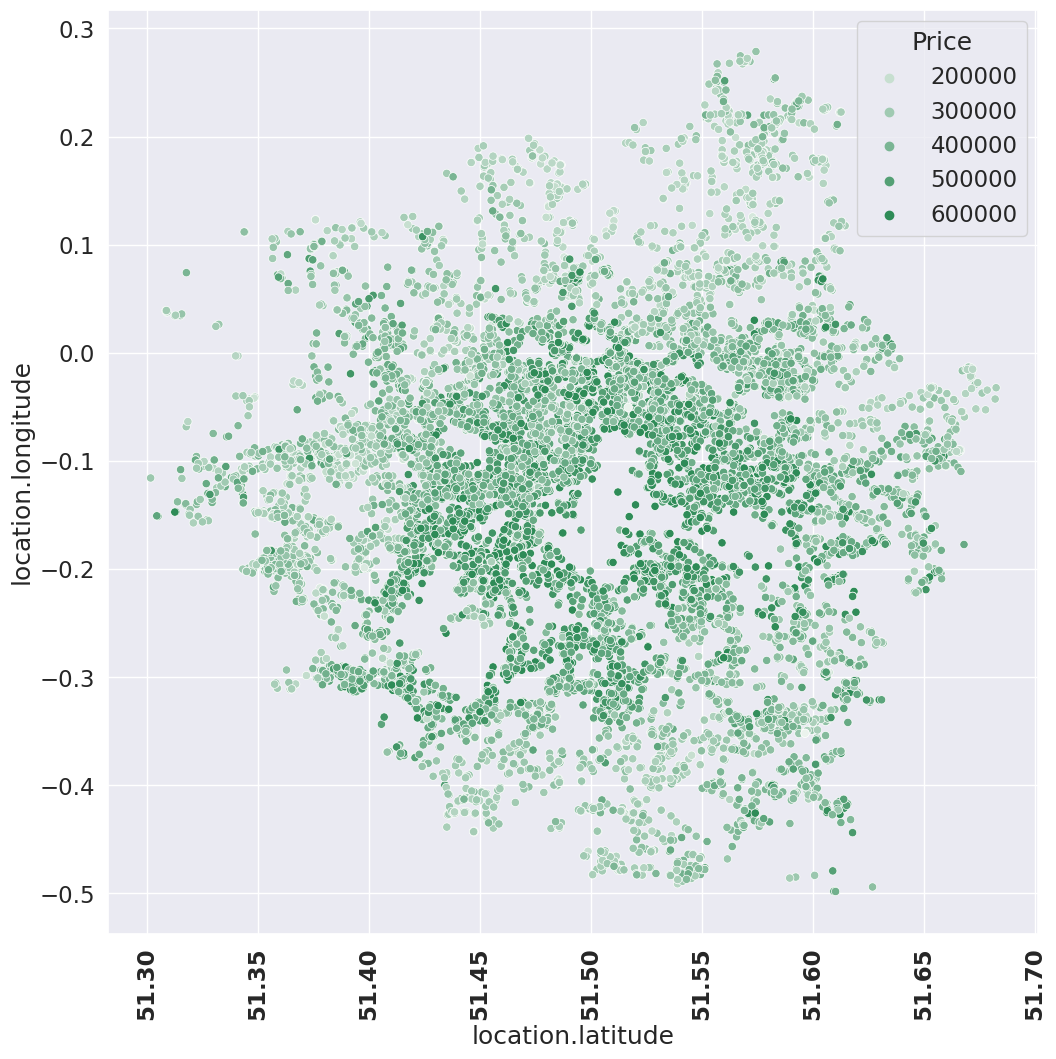

In [33]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.scatterplot(x='location.latitude', y='location.longitude', data=df[(df['bedrooms'] == 2) & (df['tenure.tenureType'] == 'LEASEHOLD')], hue='Price',palette=sns.light_palette("seagreen", as_cmap=True)
)
plt.xticks(weight='bold', rotation=90)
plt.show()